## About dataset
It is taken from Kaggle. It contains details of passengers of titanic ship. The task is to predict survival of passengers based on given features.

Dataset link: https://www.kaggle.com/datasets/brendan45774/test-file

## Problem Statement
To predict whether passenger survived or not

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
# Read data
data = pd.read_csv('tested.csv')
# Save copy of data
df = data.copy()
# View data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Columns description
|Columns|Description|Columns|Description|
|:---------|:----------|:---------|:----------|
|PassengerId|ID of passenger|SibSp|Number of siblings/spouses aboard|
|Survived|Whether passenger survived or not (0: No, 1:Yes)|Parch|Number of parents/children aboard|
|Pclass|Passenger class (1:First, 2:Second, 3:Third)|Ticket|Ticket number|
|Name|Name of passenger|Fare|Passenger fare (in British Pounds)|
|Sex|Whether male or female|Cabin|Cabin of the ship|
|Age|Age of passenger|Embarked|Port of Embarkation (C:Cherbourg, Q:Queenstown, S:Southampton)|

## Exploring data

In [3]:
df.shape

(418, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
# Check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

0

## Observation
* There are 418 rows and 12 columns.
* There are no duplicates in the data.
* There are some null values in 'Age', 'Fare' and 'Cabin' columns.
* There are 5 categorical columns and rest are numerical.

## Data preprocessing

* ### Dropping unimportant columns
As columns 'PassengerID', 'Name' and 'Ticket' are statistically unimportant. Let's drop them. Moreover, 'Cabin' column has more than half of its data missing. So let's drop it as well.

In [7]:
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1, inplace = True)
# View changes
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q


* ### Changing categorical columns into numerical
As columns 'Sex' and 'Embarked' are categorical, I will convert them into numerical dtype using replace() function.

In [8]:
# Checking values to be replaced
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

male      266
female    152
Name: Sex, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [9]:
# Using replace() function
df['Sex'] = df['Sex'].replace({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].replace({'S':0, 'C':1, 'Q':2})

* ### Fill null values
There are null values in columns 'Age' and 'Fare'. Let's fill them using fillna().

In [10]:
df['Age'].fillna(round(df["Age"].mean(), 1), inplace = True)
df['Fare'].fillna(round(df["Fare"].mean(), 4), inplace = True)
# Checking null values again
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
# Review data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


## Data visualization

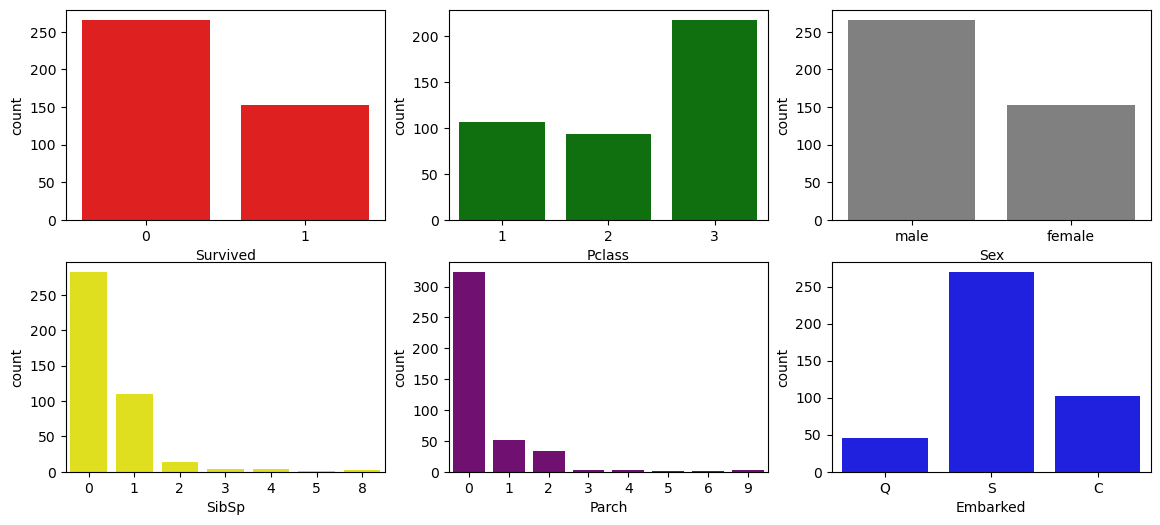

In [12]:
columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
colors = ['red', 'green', 'gray', 'yellow', 'purple', 'blue']

plt.figure(figsize=(14,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    sns.countplot(data[columns[i]], color = colors[i])
plt.show()

* Survived are less (around 150) than casualities (around 250).
* There are more passengers from third passenger class.
* Male passengers are more than female passengers.
* Most of the passengers do not have siblings, children, parents or spouses on board.
* Most of the passengers embarked on Southampton port.

<AxesSubplot:>

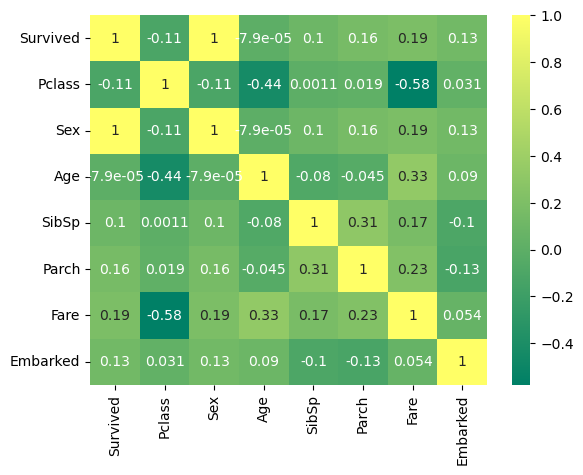

In [13]:
sns.heatmap(df.corr(), annot = True, cmap = 'summer')

Target column 'Survived' is correlated to 'Sex' column.

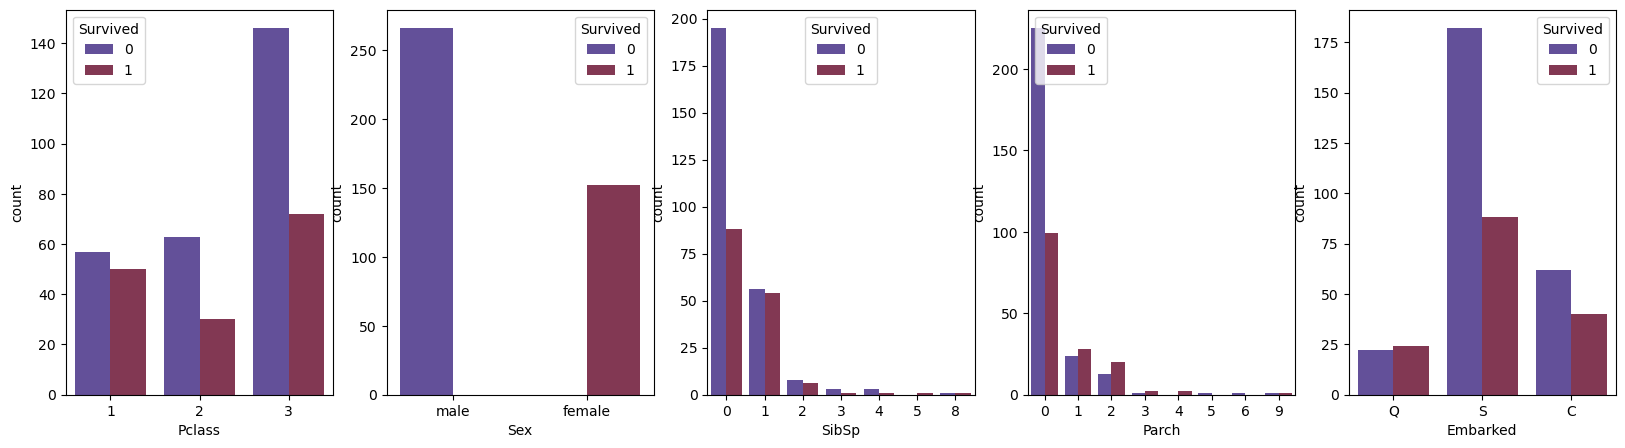

In [14]:
col = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

plt.figure(figsize=(20,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    sns.countplot(data[col[i]], hue= df['Survived'], palette = 'twilight')
plt.show()

* Most of the third class passengers died.
* All males died and females survived.
* Many passengers who did not have siblings, parents, children or spouses onborad, died.
* Most of the Southampton embarked passengers died.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

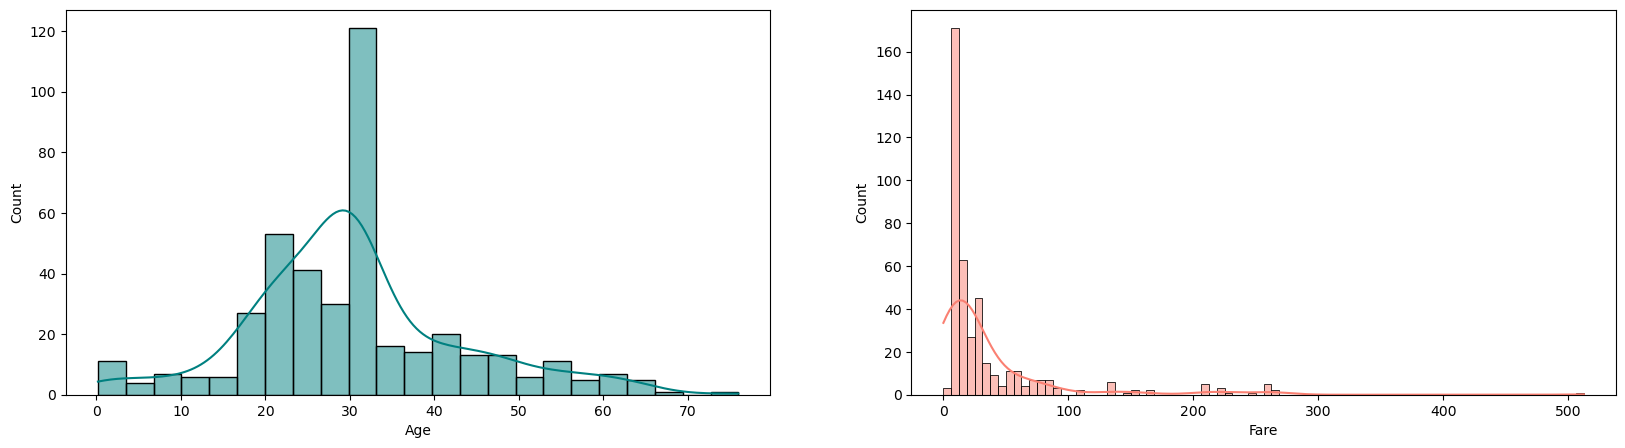

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(df['Age'], color = 'teal', kde = True)
plt.subplot(1,2,2)
sns.histplot(df['Fare'], color = 'salmon', kde = True)

Most of the fare values are concentrated in between 0 to 100 pounds and that of age values in 20 to 40 years.

## Building Model: k-Nearest Neighbor

In [16]:
# Define x & y
x = df.iloc[:,1:]
y = df['Survived']

In [17]:
# Train-test-split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.35, random_state=32)

In [18]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain))
xtest = pd.DataFrame(ss.transform(xtest))

In [19]:
# Hyperparameter tuning using GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 

parameters = {'n_neighbors':np.arange(1, 40, 2)}

from sklearn.model_selection import GridSearchCV
gd= GridSearchCV(knn, parameters, cv=5, n_jobs = -1, verbose = 1)
gd.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])},
             verbose=1)

In [20]:
# Best parameters
print("Best Score: ", gd.best_score_) 
print("Best Parameters: ", gd.best_params_)

Best Score:  0.9963636363636365
Best Parameters:  {'n_neighbors': 9}


In [21]:
# Evaluating model for best parameters
knn_best = KNeighborsClassifier(n_neighbors=9)
knn_best.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [22]:
# Prediction
ypred = knn_best.predict(xtest)

In [23]:
# Evaluating model using sklearn metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy: {}%.'.format(round(accuracy_score(ytest, ypred)*100, 2)))
print('-----------------------------------------------')
print('Confusion matrix: \n', confusion_matrix(ytest, ypred))
print('-----------------------------------------------')
print('Classification report: \n', classification_report(ytest, ypred))

Accuracy: 98.64%.
-----------------------------------------------
Confusion matrix: 
 [[96  0]
 [ 2 49]]
-----------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.96      0.98        51

    accuracy                           0.99       147
   macro avg       0.99      0.98      0.98       147
weighted avg       0.99      0.99      0.99       147



### Accuracy of this model is 98% !!